___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://cdn-images-1.medium.com/max/800/1*Gr0Jhqw8wzoosvm4XdMl4Q.jpeg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Paula Daniela Cárdenas Gallardo </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `p.daniela.cardenas@gmail.com` </font>

___


### <font color= #2E9AFE> Tema: Sistemas de Recomendación</font>

El principio básico de los sistemas de recomendación es que existen dependencias significativas entre el usuario y la actividad centrada en los productos (items).

Estas dependencias pueden ser aprendidas a través de las matrices de calificaciones, y el modelo resultante es usado para hacer predicciones para usuarios objetivo. 

**Existen dos modelos principales**:
- Predicción de una versión del problema. En este caso tenemos una matriz incompleta de valores (Es el más utilizado)
- Ranking de una versión del probema. Se recomiendan los principales "k" items para un usuario 


**Características y objetivos de los sistemas de recomendación**:
- Relevancia: hacer recomendaciones que sean relevantes para el usuario
- Novedoso: recomendar algo que el usuario no ha visto antes
- Serenidad: recomendar ocasionalmente algo novedoso y diferente a sus gustos

**Tipos de datos con los que trabajan los sistemas de recomendación**:
- Interacción usuario-producto, ya sea calificaciones (ratings) o comportamiento de compras
- Información sobre los usuario y productos, ya sea como perfil del cliente o palabras clave

**Tipos de modelos**:
- Filtrado colaborativo: usan los primeros tipos de datos
- Recomendaciones basadas en contenido: Usan los segundos tipos de datos
- Recomendaciones basadas en conocimiento: usar conocimiento externo y restricciones
- Sistemas híbridos: combina varios tipos de sistemas de recomendación

### Filtrado colaborativo
**Filtrado colaborativo:**
- Usan el poder de las calificaciones (ratings) proveídos por varios usuarios para hacer recomendaciones
- El reto principal de estos modelos es que las matrices de ratings no están completas
- La idea de estos ratings faltantes es que pueden ser imputados o rellenados dado a que las calificaciones comúnmente están altamente correlacionadas entre varios usuarios y productos 

**Matriz de rating**

Las filas representan usuarios
Las columnas son películas
Hay películas que no han calificado (espacios vacíos)

La intención del sistema recomendador es principalmente estimar esos espacios en blanco


|    | Gladiator | Godfather | Ben-Hur | Goodfellas | Scarface | Spartacus |
|----|-----------|-----------|---------|------------|----------|-----------|
| U1 | 1         |           |         | 5          |          | 2         |
| U2 |           | 5         |         |            | 4        |           |
| U3 | 5         | 3         |         | 1          |          |           |
| U4 |           |           | 3       |            |          | 4         |
| U5 |           |           |         | 3          | 5        |           |
| U6 | 5         |           | 4       |            |          |           |


|    | Gladiator | Godfather | Ben-Hur | Goodfellas | Scarface | Spartacus |
|----|-----------|-----------|---------|------------|----------|-----------|
| U1 | 1         |           |         | 1          |          | 1         |
| U2 |           | 1         |         |            | 1        |           |
| U3 | 1         | 1         |         | 1          |          |           |
| U4 |           |           | 1       |            |          | 1         |
| U5 |           |           |         | 1          | 1        |           |
| U6 | 1         |           | 1       |            |          |           |

**Diferencia entre problema de clasificación y filtrado colaborativo**

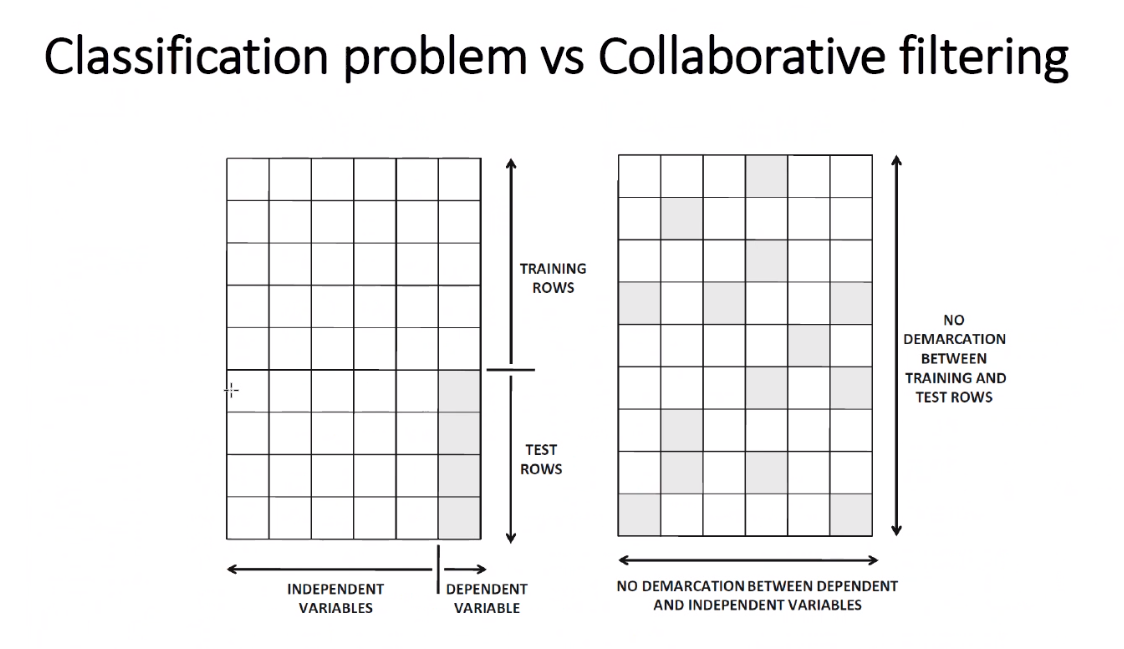

Asumimos que la matriz de usuario-producto es una matriz incompleta *m x n* donde $R=[r_{uj}]$

Para la matriz *m x n* de calificaciones donde $R=[r_{uj}]$ con *m* usuarios y *n* productos. Donde $I_{u}$ representa el conjunto de índices de productos cuyas calificaciones fueron especificados por el usuario *u*

Por lo tanto, el conjunto de productos calificado por dos usuarios *u* y *v* es dado por $I_{u}\cap I_{v}$

**¿Cómo calculamos esta intersección?**

Necesitamos una medida de similitud...

#### Coeficiente de correlación de pearson

$\mu_{u}= \frac{\sum_{k\in I_{u}}r_{uk}}{|I_{u}|}$ 

$sim(u,v)=Pearson(u,v)= \frac{\sum_{k\in I_{u}\cap I_{v}}(r_{uk}-\mu_{u})\cdot(r_{vk}-\mu_{v})}{\sqrt{\sum_{k\in I_{u}\cap I_{v}}(r_{uk}-\mu_{u})^{2}}\cdot\sqrt{\sum_{k\in I_{u}\cap I_{v}}(r_{vk}-\mu_{v})^{2}}}$

El problema principal con este método es que algunos usuarios pueden proveer calificaciones en diferenes escalas. Por lo tanto las calificaciones deben ser centradas hacia su media. 

**Función de predicción**

$\hat{r}_{uj}=\mu_{u}+\frac{\sum_{v\in P_{u(j)}}sim(u,v)\cdot (r_{vj}-\mu_{v})}{\sum_{v\in P_{u(j)}}|sim(u,v)|}$

**Ejemplo**

Ver en pizarrón


**Cosine**

$RawCosine(u,v) = \frac{\sum_{k\in I_{u}\cap I_{v}}(r_{uk}\cdot r_{vk})}{\sqrt{\sum_{k\in I_{u}\cap I_{v}}(r_{uk})^{2}}\cdot\sqrt{\sum_{k\in I_{u}\cap I_{v}}(r_{vk})^{2}}}$


Cuando dos usuarios sólo tienen muy pocas calificaciones en común, la función de similitud debe de ser reducida con un factor de "descuento", para quitar un poco de importancia a esos datos.

$SimilitudDescontada(u,v)=sim(u,v)\cdot \frac{min{|I_{u}\cap I_{v},\beta|}}{\beta}$

#### Variantes de la función de predicción

**Calificación estandarizada z-score**

$z_{uj}=\frac{r_{uj}-\mu_{u}}{\sigma_{u}}$

$\hat{r}_{uj}=\mu_{u}+\frac{\sum_{v\in P_{u(j)}}sim(u,v)\cdot Z_{vj}}{\sum_{v\in P_{u(j)}}|sim(u,v)|}$

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importar datos
rawdata = pd.read_excel('/Users/Daniela Cardenas/Documents/ITESO/3° Semestre/Laboratorio de Modelado de Datos/Test de películas.xlsx',
                        index_col= 0)
rawdata = rawdata.loc[::-1]
rawdata.head()


,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Total de puntos,Comentarios del cuestionario,Sobrenombre,Puntos: Sobrenombre,Comentarios: Sobrenombre,Inteligencia Artificial,...,Comentarios: The shape of water,Aquaman,Puntos: Aquaman,Comentarios: Aquaman,El lobo de wall street,Puntos: El lobo de wall street,Comentarios: El lobo de wall street,Una serie de eventos desafortunados,Puntos: Una serie de eventos desafortunados,Comentarios: Una serie de eventos desafortunados
ID,,,,,,,,,,,,,,,,,,,,,
121,2020-12-02 20:40:13.000002,2020-12-02 20:40:21.000003,anonymous,NaN,NaN,NaN,Lulu,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2020-12-02 20:38:55.000000,2020-12-02 20:40:06.999998,anonymous,NaN,NaN,NaN,Booo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
119,2020-12-02 20:34:46.000004,2020-12-02 20:39:35.000003,anonymous,NaN,NaN,NaN,eleanor abernathy,NaN,NaN,5.0,...,NaN,5.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN
118,2020-12-02 20:34:30.999997,2020-12-02 20:38:25.000002,anonymous,NaN,NaN,NaN,Mami Rica,NaN,NaN,5.0,...,NaN,5.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN
117,2020-12-02 20:34:26.999996,2020-12-02 20:38:18.999998,anonymous,NaN,NaN,NaN,PMC,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [3]:
# Seleccionar los datos con las calificaciones
def select_columns(x):
    csel = np.arange(9,246,3)
    users1 = list(x.iloc[:,6])
    cnames1 = list(x.columns.values[csel])
    x = x[cnames1]
    x.index = users1
    return x

data = select_columns(rawdata)
data = data.drop(['Gaby','Pabul','Lulu'],axis=0)#quitamos estos records que están mal
data.head()

,Inteligencia Artificial,Super Man,E.T.,Interestelar,Mr. Nobody,Star Wars,V de Vendeta,Avatar,Contacto,El Origen (Inception),...,El señor de los anillos,Harry Potter,Blanca Nieves,Big fish,Narnia,El laberinto del fauno,The shape of water,Aquaman,El lobo de wall street,Una serie de eventos desafortunados
Booo,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,4.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN
eleanor abernathy,5.0,4.0,5.0,NaN,NaN,5.0,5.0,5.0,NaN,5.0,...,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0,3.0
Mami Rica,5.0,5.0,5.0,4.0,1.0,5.0,4.0,5.0,4.0,3.0,...,5.0,5.0,1.0,4.0,3.0,3.0,5.0,5.0,5.0,3.0
PMC,NaN,1.0,3.0,4.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,5.0,NaN,5.0,4.0,NaN,3.0,4.0,NaN,5.0
sara,1.0,3.0,3.0,5.0,NaN,5.0,5.0,5.0,NaN,5.0,...,5.0,5.0,4.0,NaN,1.0,1.0,2.0,3.0,4.0,2.0


In [4]:
# Vistazo de los grupos de calificaciones
sample = 4 # Seleccionar sólo 4 usuarios para el ejemplo

# Sacar las calificaciones por cada una de las películas
cnames1 = list(data.columns.values)
mean_movies_group = pd.DataFrame(columns=cnames1)
mean_movies_group.loc['Ranking']=data.iloc[0:sample,:].mean(axis=0,skipna=True)

In [5]:
mean_movies_group

,Inteligencia Artificial,Super Man,E.T.,Interestelar,Mr. Nobody,Star Wars,V de Vendeta,Avatar,Contacto,El Origen (Inception),...,El señor de los anillos,Harry Potter,Blanca Nieves,Big fish,Narnia,El laberinto del fauno,The shape of water,Aquaman,El lobo de wall street,Una serie de eventos desafortunados
Ranking,5.0,3.333333,4.333333,4.0,1.0,5.0,3.666667,4.25,4.0,4.0,...,3.25,5.0,3.0,4.5,3.333333,4.0,4.5,4.666667,4.333333,3.666667


In [6]:
#Calificaciones por usuario
usernames = list(data.index[0:sample])
mean_users_group = pd.DataFrame(columns=usernames)
mean_users_group.loc['Ranking']=data.iloc[0:sample,:].mean(axis=1,skipna=True)
mean_users_group

,Booo,eleanor abernathy,Mami Rica,PMC
Ranking,3.8,4.711111,3.61039,2.886364


In [7]:
# Similitud de Pearson usando todas las calificaciones por usuario
def sim_pearson1(target_user,data):
    sim_pearson = pd.DataFrame(columns=[target_user,'mean'])
    usernames = list(data.index)
    mean_users = data.mean(axis=1,skipna=True)
    for user in usernames:
        idx = (~np.isnan(data.loc[target_user]))&(~np.isnan(data.loc[user]))
        s_target = data.loc[target_user][idx]-mean_users[target_user]
        s_user = data.loc[user][idx]-mean_users[user]
        sim = np.sum(s_target*s_user)/(np.sqrt(np.sum(s_target**2))*np.sqrt(np.sum(s_user**2)))
        sim_pearson.loc[user] = [sim,mean_users[user]]
    idx_s = np.argsort(sim_pearson[target_user])
    return sim_pearson.iloc[idx_s[::-1],:]

target_user = 'PMC'
res1_sim = sim_pearson1(target_user,data)

In [8]:
res1_sim

,PMC,mean
PMC,1.000000,2.886364
brus,0.814462,4.464286
Rafa,0.598983,4.227273
Agua,0.559242,4.187500
Karimme,0.547314,4.458333
...,...,...
oyefuentes,-0.312347,3.642857
Walky,-0.335613,2.880597
Dinho,-0.338494,3.380952
6115 Jose Enrique Lopez,-0.353783,3.361111


In [9]:
# Similitud de Pearson usando solo las calificaciones por usuario que intersectan
def sim_pearson2(target_user,data):
    sim_pearson = pd.DataFrame(columns=[target_user,'mean'])
    usernames = list(data.index)
    mean_users = pd.DataFrame(columns=[0])
    for user in usernames:
        idx = (~np.isnan(data.loc[target_user]))&(~np.isnan(data.loc[user]))
        mean_users.loc[target_user] = data.loc[target_user][idx].mean(skipna=True)
        mean_users.loc[user] = data.loc[user][idx].mean(skipna=True)
        s_target = data.loc[target_user][idx]-mean_users.loc[target_user][0]
        s_user = data.loc[user][idx]-mean_users.loc[user][0]
        sim = np.sum(s_target*s_user)/(np.sqrt(np.sum(s_target**2))*np.sqrt(np.sum(s_user**2)))
        sim_pearson.loc[user] = [sim,mean_users.loc[user][0]]
    idx_s = np.argsort(sim_pearson[target_user])
    return sim_pearson.iloc[idx_s[::-1],:]

target_user = 'PMC'
res2_sim = sim_pearson2(target_user,data)

In [10]:
res2_sim

,PMC,mean
PMC,1.000000,2.886364
brus,0.799501,4.619048
Rafa,0.566654,4.400000
Agua,0.563838,4.217391
Lizette,0.554030,3.350000
...,...,...
oyefuentes,-0.285677,3.437500
Walky,-0.335247,2.763158
Dinho,-0.359554,3.333333
GSP030323,-0.361659,3.800000


In [11]:
# Recomendación de películas
# Recomendación usando los "k" más cercano usuarios y scores ponderados

def RS_weighted(data,target_user,k_near=10,sim_func=sim_pearson1):
    res_sim = sim_func(target_user,data)
    users_sim = list(res_sim.index[1:k_near+1])
    movies_names = list(data.columns[np.isnan(data.loc[target_user])])
    users_sim_rankigs = data.loc[users_sim][movies_names]
    users_sim_rankigs[np.isnan(users_sim_rankigs)]=0
    return pd.DataFrame(np.dot(res_sim.iloc[1:k_near+1,0].T,users_sim_rankigs)/np.sum(np.abs(res_sim.iloc[1:k_near+1,0])),index=movies_names)

k_near = 10
target_user = 'PMC'
Rhat1 = RS_weighted(data,target_user)

In [12]:
Rhat1.rename(columns={0 :'Recomendacion'}, inplace=True )
Rhat1 = Rhat1.sort_values(by=['Recomendacion'], ascending=False)
Rhat1

,Recomendacion
Blanca Nieves,3.199531
El lobo de wall street,2.574376
Como si fuera la primera vez,2.454286
South park,2.278213
La mascara,2.118612
A star is born,1.949637
The proposal,1.871498
La monja,1.763332
El exorcismo de Emily Rose,1.589986
El laberinto del fauno,1.451926


In [13]:
# Versión de predicción pero ahora ponderada a la media
def RS_mean_centering(data,target_user,k_near=10,sim_func=sim_pearson1):
    res_sim = sim_func(target_user,data)
    users_sim = list(res_sim.index[1:k_near+1])
    movies_names = list(data.columns[np.isnan(data.loc[target_user])])
    users_sim_rankigs = data.loc[users_sim][movies_names]
    for k in range(len(users_sim_rankigs.iloc[0,:])):
        users_sim_rankigs.iloc[:,k] = users_sim_rankigs.iloc[:,k]-res_sim.loc[users_sim]['mean']
    users_sim_rankigs[np.isnan(users_sim_rankigs)]=0
    return pd.DataFrame(np.dot(res_sim.iloc[1:k_near+1,0].T,users_sim_rankigs)/np.sum(np.abs(res_sim.iloc[1:k_near+1,0]))+res_sim.loc[target_user]['mean'],index=movies_names)

k_near = 10
target_user = 'PMC'
Rhat2 = RS_mean_centering(data,target_user)

In [14]:
Rhat2.rename(columns={0 :'Recomendacion'}, inplace=True )
Rhat2 = Rhat2.sort_values(by=['Recomendacion'], ascending=False)
Rhat2

,Recomendacion
El lobo de wall street,3.214980
Como si fuera la primera vez,3.079119
South park,3.009962
La terminal,3.001831
Matrix,2.969221
About time,2.969221
El laberinto del fauno,2.951853
Your name,2.949436
Endless love,2.943370
El Origen (Inception),2.939450


In [15]:
# Probar con otra similitud - Cosine usando sólo las intersecciones
def sim_cosine1(target_user,data):
    sim_ = pd.DataFrame(columns=[target_user,'mean'])
    usernames = list(data.index)
    mean_users = data.mean(axis=1,skipna=True)
    for user in usernames:
        idx = (~np.isnan(data.loc[target_user]))&(~np.isnan(data.loc[user]))
        sim = np.sum(data.loc[target_user][idx]*data.loc[user][idx])/(np.sqrt(np.sum(data.loc[target_user][idx]**2))*np.sqrt(np.sum(data.loc[user][idx]**2)))
        sim_.loc[user] = [sim,mean_users[user]]
    idx_s = np.argsort(sim_[target_user])
    return sim_.iloc[idx_s[::-1],:]

target_user = 'PMC'
res1_sim = sim_cosine1(target_user,data)

In [16]:
res1_sim

,PMC,mean
PMC,1.000000,2.886364
Chiki,0.947919,3.777778
Lizette,0.947502,3.360000
Rafa,0.947295,4.227273
Alez,0.945232,3.837838
...,...,...
El Frances,0.811606,2.567568
Werita,0.798604,2.538462
Mami Rica,0.772583,3.610390
GSP030323,0.765208,3.794118


In [17]:
# Similitud de cosine - usando todas las calificaciones
def sim_cosine2(target_user,data):
    sim_ = pd.DataFrame(columns=[target_user,'mean'])
    usernames = list(data.index)
    mean_users = data.mean(axis=1,skipna=True)
    for user in usernames:
        idx = (~np.isnan(data.loc[target_user]))&(~np.isnan(data.loc[user]))
        sim = np.sum(data.loc[target_user][idx]*data.loc[user][idx])/(np.sqrt(np.sum(data.loc[target_user]**2))*np.sqrt(np.sum(data.loc[user]**2)))
        sim_.loc[user] = [sim,mean_users[user]]
    idx_s = np.argsort(sim_[target_user])
    return sim_.iloc[idx_s[::-1],:]

target_user = 'PMC'
res2_sim = sim_cosine2(target_user,data)

In [18]:
res2_sim

,PMC,mean
PMC,1.000000,2.886364
ElMichi,0.751736,3.193548
Adriana,0.738924,3.323529
Giotoflo,0.732327,3.816327
Fiona,0.726817,3.323529
...,...,...
galleta,0.481017,2.916667
GSP030323,0.478919,3.794118
Valery,0.461074,3.285714
Pan,0.452496,4.500000


In [19]:
# En resumen
k_near = 10
target_user = 'PMC'

R_summary = pd.DataFrame(columns=['Pearson_Weighted','Pearson_Mean_Center','Cosine_Weighted','Cosine_Mean_Center'])
R_summary['Pearson_Weighted'] = RS_weighted(data,target_user,k_near=10,sim_func=sim_pearson1)[0]
R_summary['Pearson_Mean_Center'] = RS_mean_centering(data,target_user,k_near=10,sim_func=sim_pearson1)[0]
R_summary['Cosine_Weighted'] = RS_weighted(data,target_user,k_near=10,sim_func=sim_cosine1)[0]
R_summary['Cosine_Mean_Center'] = RS_mean_centering(data,target_user,k_near=10,sim_func=sim_cosine1)

In [20]:
R_summary

,Pearson_Weighted,Pearson_Mean_Center,Cosine_Weighted,Cosine_Mean_Center
Inteligencia Artificial,0.270334,2.810865,0.301479,2.802167
Mr. Nobody,0.000000,2.886364,0.000000,2.886364
Star Wars,1.184423,2.668176,1.694276,2.696883
Contacto,0.191510,2.772075,0.200488,2.766718
El Origen (Inception),1.091096,2.939450,1.199346,2.947112
Matrix,0.801853,2.969221,0.893116,2.947214
Lucy,0.845608,2.663339,0.300732,2.866962
La terminal,0.448084,3.001831,0.000000,2.886364
"Ghost, la sombra del amor",0.934018,2.699503,1.296648,2.996075
A star is born,1.949637,2.668345,1.495782,2.850657


El sistema de recomendación es simple, se necesita:
+ La matriz de *rankings*
+ Definir una medida de similitud
+ Definir la forma en como van a hacer sus recomendaciones